# KNN - K-Nearest Neighbor

A supervised classification algorithm that works with multidimentional data.

I used the wine dataset, available at Kaggle. For data cleaning procedures see "K-means" repository.

The data include 13 characteristics of wine and a variable called "Clusters", which is the classification provided by UCI.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn

from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import warnings
import os
from scipy import stats
warnings.filterwarnings("ignore", category=FutureWarning)

## Import and explore data

In [3]:
path = 'C:/Users/Katia/Documents/Machine learning'
os.chdir(path)

df = pd.read_csv('wine_clean.csv', sep=',')

In [4]:
df

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,Proline,Clusters
0,14.23,1.7100,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,1065.0,1
1,13.20,1.7800,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,1050.0,1
2,13.16,2.3600,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,1185.0,1
3,14.37,1.9500,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,1480.0,1
4,13.24,2.5900,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.5422,2.45,20.5,95.0,0.61,0.52,1.06,7.70,0.64,740.0,3
174,13.40,3.9100,2.48,23.0,102.0,0.75,0.43,1.41,7.30,0.70,750.0,3
175,13.27,4.2800,2.26,20.0,120.0,0.69,0.43,1.35,10.20,0.59,835.0,3
176,13.17,2.5900,2.37,20.0,120.0,0.68,0.53,1.46,9.30,0.60,840.0,3


In [5]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,Proline,Clusters
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.021252,0.361685,1.586445,5.064691,0.955729,745.869213,1.938202
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.979667,0.124067,0.559125,2.331528,0.223969,312.129198,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.340000,0.130000,0.410000,1.280000,0.480000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.205000,0.270000,1.250000,3.220000,0.782500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.135000,0.340000,1.555000,4.690000,0.965000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.875000,0.437500,1.950000,6.200000,1.120000,985.000000,3.000000
max,14.472800,5.542200,2.989000,28.500000,141.760000,3.791400,0.630000,3.033600,12.037500,1.426900,1522.360000,3.000000


For feature engineering and data cleaning procedures, see "K-means" repository.

## Explore significance of variables

See K-means repository.

## Exploring number of neighbors

Just for illustration purposes, I will show how KNN works through plots. This is not part of the KNN pipeline.

In [11]:
# To visualize results in a two dimentional space, I will select two variables
target2 = df['Clusters']
df2 = df[['Flavanoids', 'Alcohol']]

In [15]:
# Remove target from dataframe
y = target2
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, target2, test_size=0.2, random_state=42)

X_train.head()

,Flavanoids,Alcohol
158,1.31,14.34
137,0.60,12.53
98,3.75,12.37
159,1.10,13.48
38,2.64,13.07


In [17]:
# Check length of the sets

for dataset in [y_train, y_test]:
    print(round(len(dataset) / len(target2), 2))

0.8
0.2


In [18]:
# standardize data

z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.fit_transform(X_test)

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [20]:
# Define plot function

def plotKNN(X, y, title, n_neighbors, model):
    h = .5
    cmap_light = ListedColormap(['orange','cyan','cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    # calculate min, max and limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict class using data and KNN classifier
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the results into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    # Plot the training plots
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Classification Plot")
    plt.show()
    
# adapted from https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

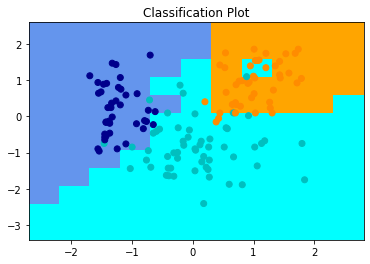

Number of neighbors:  1
Accuracy score:  0.9166666666666666


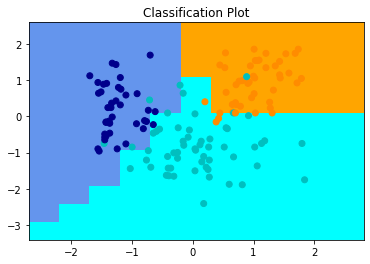

Number of neighbors:  5
Accuracy score:  0.9444444444444444


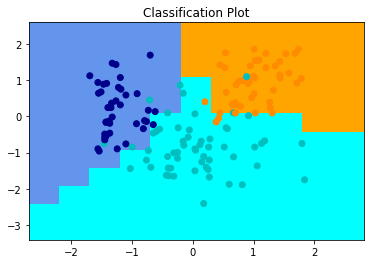

Number of neighbors:  10
Accuracy score:  0.9444444444444444


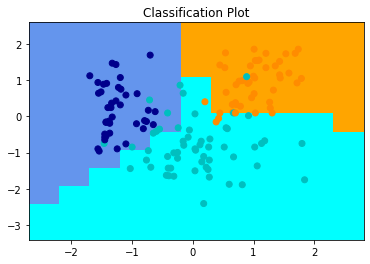

Number of neighbors:  15
Accuracy score:  0.9166666666666666


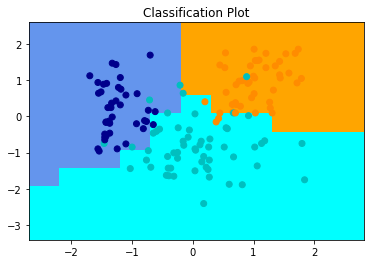

Number of neighbors:  20
Accuracy score:  0.9444444444444444


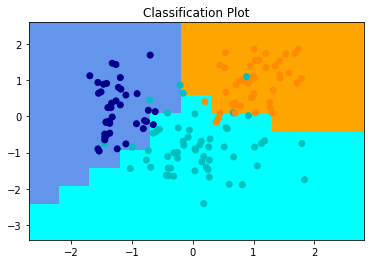

Number of neighbors:  25
Accuracy score:  0.9444444444444444


In [21]:
# Try different number of neighbors

n_neighbors = [1, 5, 10, 15, 20, 25]

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    plotKNN(X = X_train, y = y_train, title = "KNN", n_neighbors = n_neighbors, model = knn)
    print("Number of neighbors: ", n)
    print("Accuracy score: ", knn.score(X_test, y_test))

Classification seems pretty neat with a range of number of neighbors.

## Build Model

In [30]:
# Remove target from dataframe
y = df['Clusters']
X = df.drop(['Clusters'], axis =1)

# Split data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,Proline
75,11.66,1.8800,1.92,16.0,97.0,1.57,0.34,1.15,3.80,1.23,428.0
10,14.10,2.1600,2.30,18.0,105.0,3.32,0.22,2.38,5.75,1.25,1510.0
147,12.87,4.6100,2.48,21.5,86.0,0.65,0.47,0.86,7.65,0.54,625.0
123,13.05,5.5422,2.13,21.5,86.0,2.65,0.30,2.01,2.60,0.73,380.0
0,14.23,1.7100,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,1065.0


In [31]:
# Standardize data

z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.fit_transform(X_test)
X_val = z.fit_transform(X_val)

X_train

array([[-1.52306020e+00, -4.90150665e-01, -1.81111965e+00, ...,
        -5.63820339e-01,  1.23278243e+00, -9.85385284e-01],
       [ 1.36504096e+00, -2.33823900e-01, -3.16448704e-01, ...,
         3.20343716e-01,  1.32063053e+00,  2.58052912e+00],
       [-9.08461019e-02,  2.00903529e+00,  3.91553321e-01, ...,
         1.18183690e+00, -1.79797726e+00, -3.36138391e-01],
       ...,
       [ 1.69646240e+00, -4.99305192e-01, -1.78113717e-03, ...,
         1.11382428e+00,  1.10101027e+00,  2.62126360e+00],
       [-3.03902745e-01, -8.10559121e-01, -4.73782487e-01, ...,
        -9.03883437e-01,  4.68329860e-02, -7.64575427e-01],
       [-7.18179551e-01,  3.16573918e-02,  3.12886430e-01, ...,
        -1.01723780e+00, -6.55951868e-01, -9.52428589e-01]])

In [32]:
# hyperparameter tuning

In [33]:
# Conduct search for best parameters

n_neighbors = [1, 5, 10, 15, 25, 30, 35]
acc = {}

# Loop through parameters to find best model
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    acc[n] = knn.score(X_val, y_val)
print("Accuracy scores for each model: ", acc)

# Choose best parameter
best_n = max(acc, key = acc.get)
print("Number of neighbors best model: ", best_n)

# Fit model with best parameter
knn_final = KNeighborsClassifier(n_neighbors = best_n)
knn_final.fit(X_train, y_train)

# Use the test model only when the model is set
print("Accuracy best model on test data: ", knn_final.score(X_test, y_test))

Accuracy scores for each model:  {1: 0.9722222222222222, 5: 0.9722222222222222, 10: 0.9722222222222222, 15: 0.9444444444444444, 25: 0.9722222222222222, 30: 0.9722222222222222, 35: 0.9722222222222222}
Number of neighbors best model:  1
Accuracy best model on test data:  0.9166666666666666


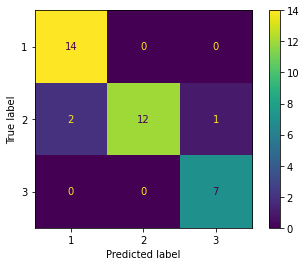

In [34]:
plot_confusion_matrix(knn_final, X_test, y_test)

Diagonal tells what the model got right and the remaining boxes what the model got wrong. Overall, the model is pretty accurate, missing only 3 cases.

In [35]:
# Metrics best model

y_pred= knn_final.predict(X_test)
y_expect = y_test

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        15
           3       0.88      1.00      0.93         7

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



## Parameter tuning with GridSearch

An alternative to tuning parameters with a loop is to use GridSearch.

In [40]:
# Separate target and variables
y = df['Clusters']
X = df.drop(['Clusters'], axis =1)

# Split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Set up the range of values for number of neighbors
ks = {'kneighborsclassifier__n_neighbors': range(1, 30)}
knn = KNeighborsClassifier()

# Create a score object to z-score sets separately
sts = StandardScaler()
vars = []
for col in X:
    vars.append(col)
z = make_column_transformer((sts, vars))

# Make pipeline
pipe = make_pipeline(z, knn)
print(pipe.get_params().keys())

grid = GridSearchCV(pipe, ks, scoring = 'accuracy', cv = 5, refit = True) # cross validation set at 5

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'kneighborsclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__standardscaler', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])


In [41]:
# Fit model with GridSearch
knn_best = grid.fit(X_train, y_train)
knn_best.best_estimator_.get_params()['kneighborsclassifier__n_neighbors']

18

In [42]:
# Get accuracy best model
knn_best.best_score_

0.9650246305418719

In [43]:
# Calculate accuracy with test set
knn_best.score(X_test, y_test)

1.0

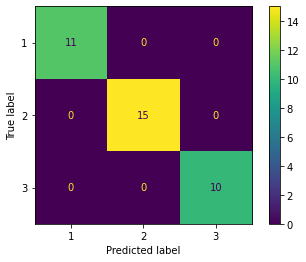

In [44]:
# Print confusion plot
plot_confusion_matrix(knn_best, X_test, y_test)

The best model with GridSearch has 18 neighbors, with an accuracy of 96% on the training set and 100% on the test set. Classification was perfect, as shown in the confusion matrix. 